In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm




In [2]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



In [5]:
def choose_color(city):
    if city == 'London':
        return 'red'
    elif city == 'Belfast' or city == 'Birmingham':
        return 'orange'
    else:
        return 'green'


In [6]:
def group_city_percentage( city , percentages):
    return [[city[i], percentages[i]] for i in range(len(city))]



C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\217254784.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


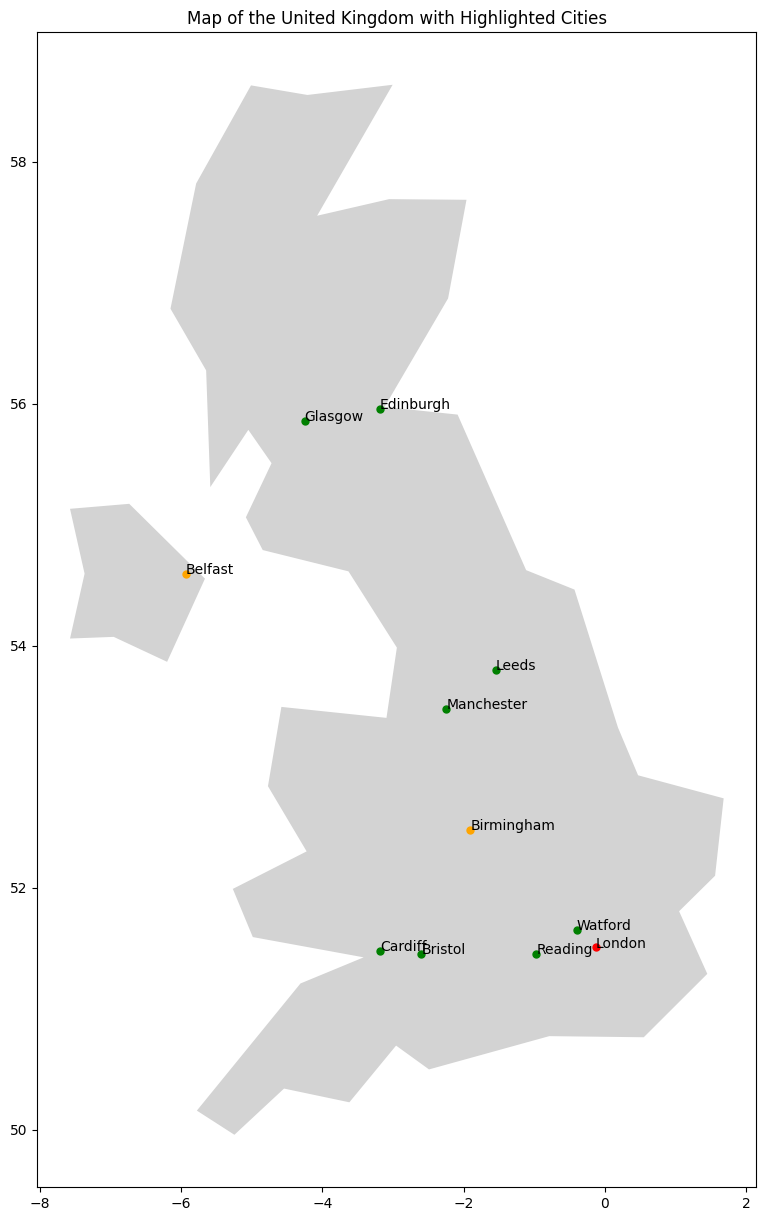

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color=choose_color(city), markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [8]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [9]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

In [10]:
cities[0]

'London'

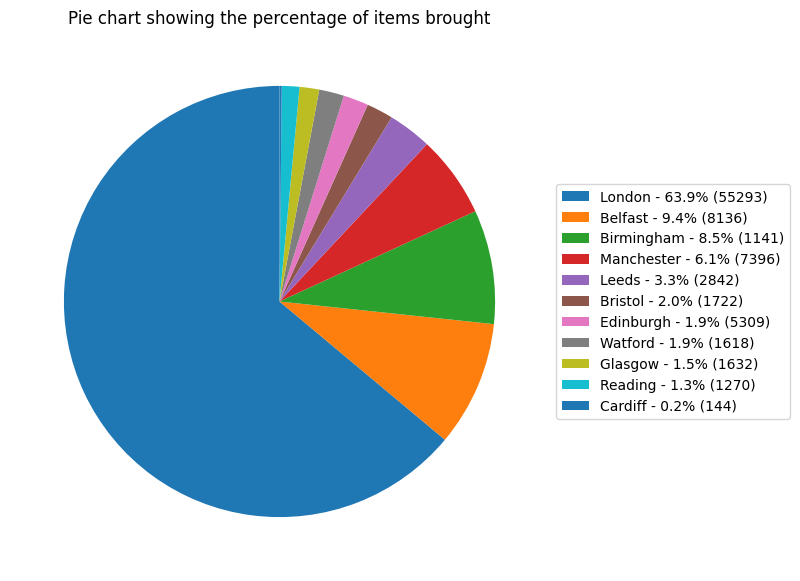

In [11]:
# Calculate the percentage for each city
percentages = [100. * amount / sum(len_of_city_array) for amount in len_of_city_array]

# Create a 2D array where each row contains a city and its corresponding percentage
city_percentage = [[city, percentage] for city, percentage in zip(cities, percentages)]

# Sort city_percentage array by the percentage in descending order
city_percentage_sorted = sorted(city_percentage, key=lambda x: x[1], reverse=True)

# Extract sorted cities and percentages
sorted_cities, sorted_percentages = zip(*city_percentage_sorted)

# Creating the pie chart without displaying percentages on the chart itself, rotating 90 degrees anti-clockwise
plt.figure(figsize=(14, 7))
wedges, texts = plt.pie(sorted_percentages, startangle=90)

# Create custom labels for the legend, combining city names with their respective percentages and values
legend_labels = [f'{city} - {percentage:.1f}% ({value})' for city, percentage, value in zip(sorted_cities, sorted_percentages, len_of_city_array)]

# Adding the legend with custom labels
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie chart showing the percentage of items brought')
plt.show()


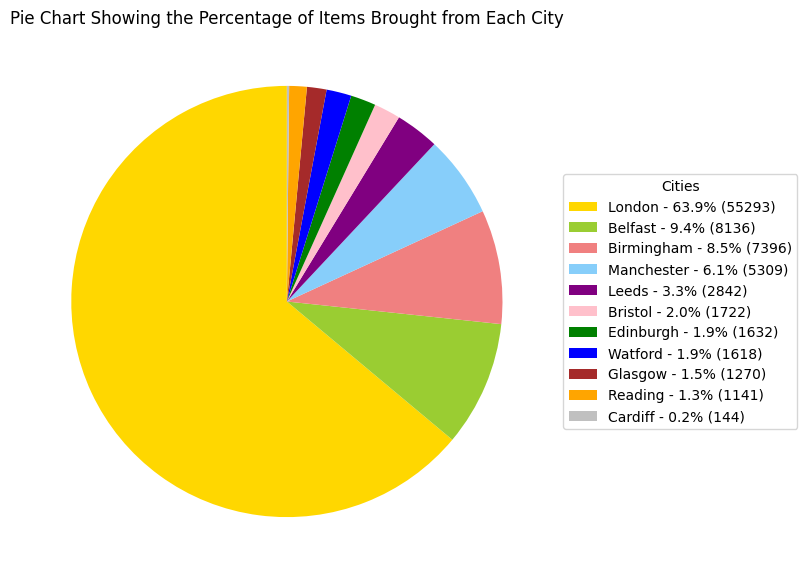

In [36]:
# Calculate the percentage for each city
total_items = sum(len_of_city_array)
if total_items == 0:
    print("No items to display.")
else:
    percentages = [100. * amount / total_items for amount in len_of_city_array]

    # Create a 2D array where each row contains a city and its corresponding percentage
    city_percentage = [[city, percentage] for city, percentage in zip(cities, percentages)]

    # Sort city_percentage array by the percentage in descending order
    city_percentage_sorted = sorted(city_percentage, key=lambda x: x[1], reverse=True)

    # Extract sorted cities and percentages
    sorted_cities, sorted_percentages = zip(*city_percentage_sorted)

    # Define colors (as many as the number of cities)
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple' , 'pink' , 'green' , 'blue' , 'brown' , 'orange' , 'silver']

    # Creating the pie chart with colors and rotating 90 degrees anti-clockwise
    plt.figure(figsize=(14, 7))
    wedges, texts = plt.pie(sorted_percentages, startangle=90, colors=colors)

    # Create custom labels for the legend, combining city names with their respective percentages and values
    len_sorted = [len_of_city_array[cities.index(city)] for city in sorted_cities]
    legend_labels = [f'{city} - {percentage:.1f}% ({value})' for city, percentage, value in zip(sorted_cities, sorted_percentages, len_sorted)]

    # Adding the legend with custom labels and corresponding colors
    plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title="Cities")

    plt.title('Pie Chart Showing the Percentage of Items Brought from Each City')
    plt.show()


In [12]:
city_percentage

[['London', 63.92032646266603],
 ['Belfast', 9.405454146098979],
 ['Reading', 1.319029397824353],
 ['Birmingham', 8.54999248580974],
 ['Leeds', 3.2854351872189405],
 ['Bristol', 1.9906824040784712],
 ['Manchester', 6.137359397939956],
 ['Watford', 1.8704553599297133],
 ['Edinburgh', 1.8866397697189692],
 ['Glasgow', 1.468157173739639],
 ['Cardiff', 0.16646821497520317]]

In [13]:
legend_labels

['London - 63.9% (55293)',
 'Belfast - 9.4% (8136)',
 'Birmingham - 8.5% (1141)',
 'Manchester - 6.1% (7396)',
 'Leeds - 3.3% (2842)',
 'Bristol - 2.0% (1722)',
 'Edinburgh - 1.9% (5309)',
 'Watford - 1.9% (1618)',
 'Glasgow - 1.5% (1632)',
 'Reading - 1.3% (1270)',
 'Cardiff - 0.2% (144)']

In [14]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [15]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [16]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [17]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [18]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [19]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

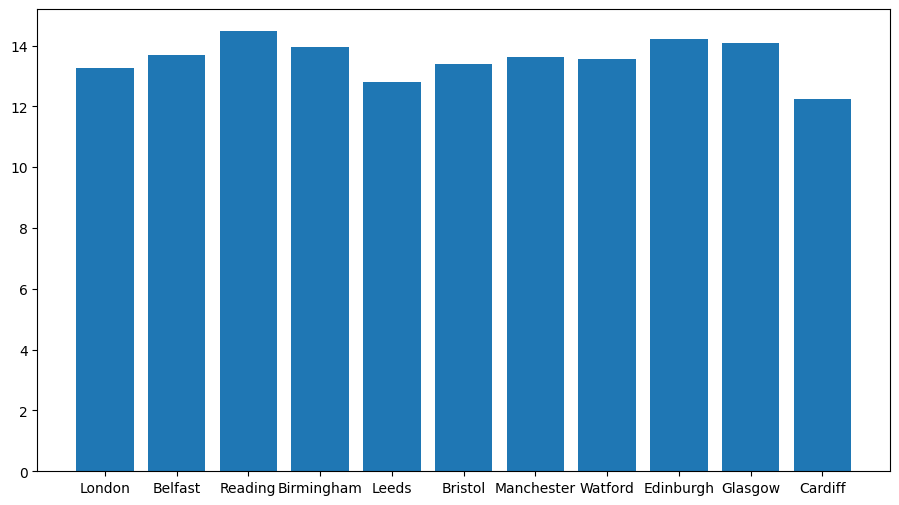

In [20]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [21]:
df_machine = df['Machine']
unique_machine = df_machine.unique()

In [22]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]


In [23]:
df_2022 = df[df['Date'].dt.year == 2022]
df_2023 = df[df['Date'].dt.year == 2023]

In [24]:
# Assuming df_items is your Series with a MultiIndex
df_items = df[['Location','Item Group']]
df_items = df_items.value_counts()
df_items = df_items.reset_index()
df_items.columns = ['Location', 'Item Group', 'Counts']  # Rename the columns for clarity
df_items_London = df_items[df_items['Location'].str.startswith('London')]
df_items_BBM = df_items[df_items['Location'].str.contains(r'^(Belfast|Birmingham|Manchester)')]
df_items_LBE = df_items[df_items['Location'].str.contains(r'^(Leeds|Bristol|Edinburgh)')]
df_items_WGR = df_items[df_items['Location'].str.contains(r'^(Watford|Glasgow|Reading)')]
df_items_C = df_items[df_items['Location'].str.contains(r'^(Cardiff)')]



C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\2337685671.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_items_BBM = df_items[df_items['Location'].str.contains(r'^(Belfast|Birmingham|Manchester)')]
C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\2337685671.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_items_LBE = df_items[df_items['Location'].str.contains(r'^(Leeds|Bristol|Edinburgh)')]
C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\2337685671.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_items_WGR = df_items[df_items['Location'].str.contains(r'^(Watford|Glasgow|Reading)')]
C:\Users\Boomw\AppData\Local\Temp\ipykernel_18420\2337685671.py:10: UserWarning: This pattern is interpreted as a regu

In [25]:
df_items.iloc[0]

Location              London
Item Group    iPhone Charger
Counts                 18639
Name: 0, dtype: object

In [26]:
df_item_count = df[['Location' , 'Item Group']].groupby('Location').count()
df_item_count

,Item Group
Location,
Belfast,8136
Birmingham,7396
Bristol,1722
Cardiff,144
Edinburgh,1632
Glasgow,1270
Leeds,2842
London,55293
Manchester,5309


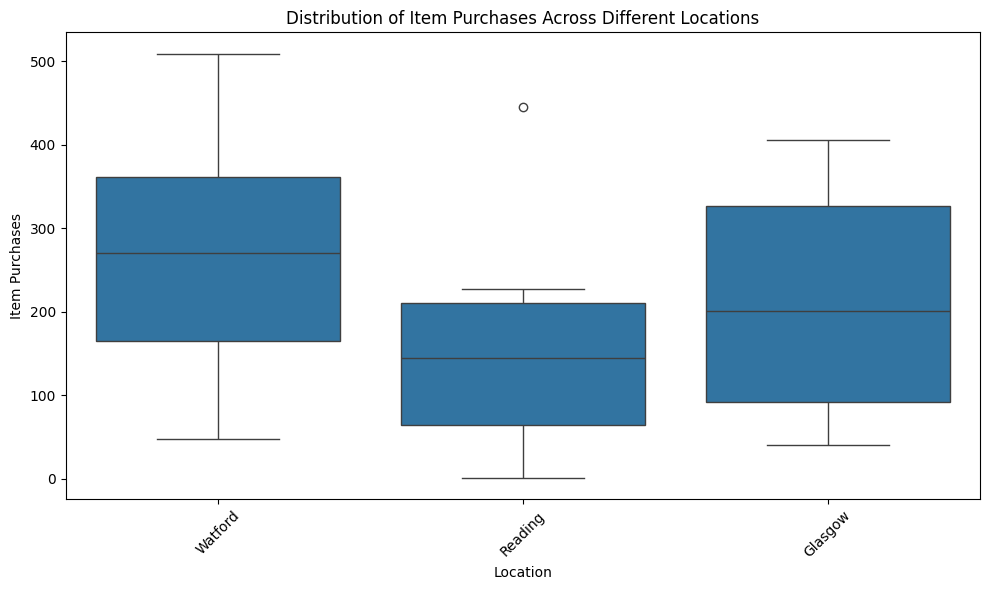

In [27]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_items_WGR, x='Location', y='Counts')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

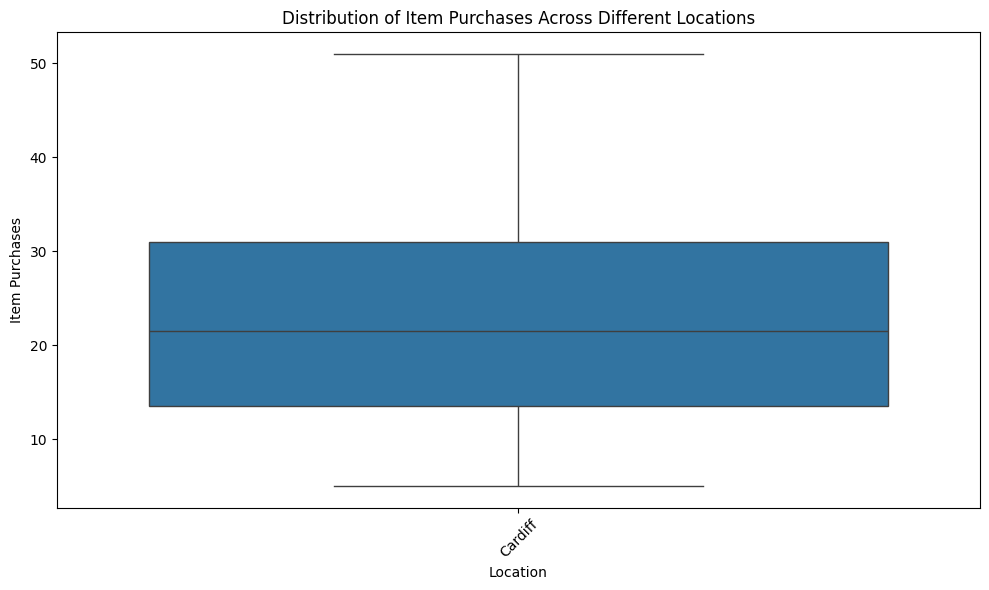

In [28]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_items_C, x='Location', y='Counts')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

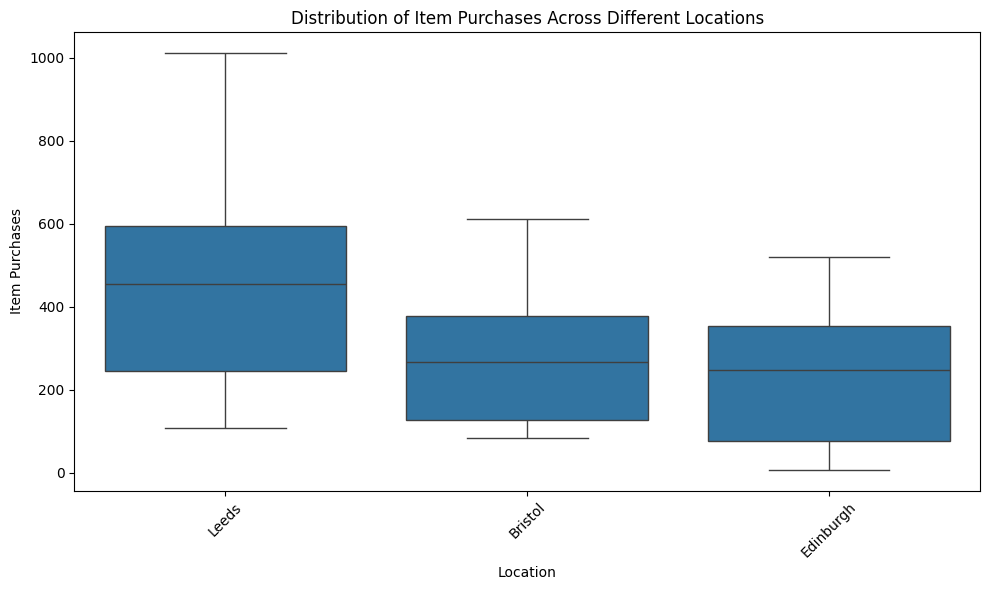

In [29]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_items_LBE, x='Location', y='Counts')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

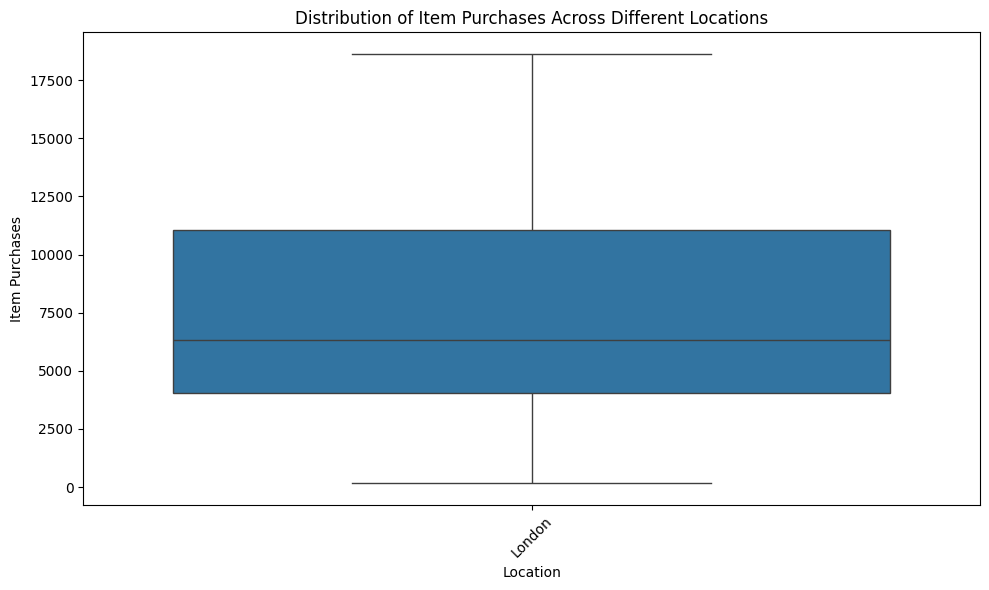

In [30]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_items_London, x='Location', y='Counts')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

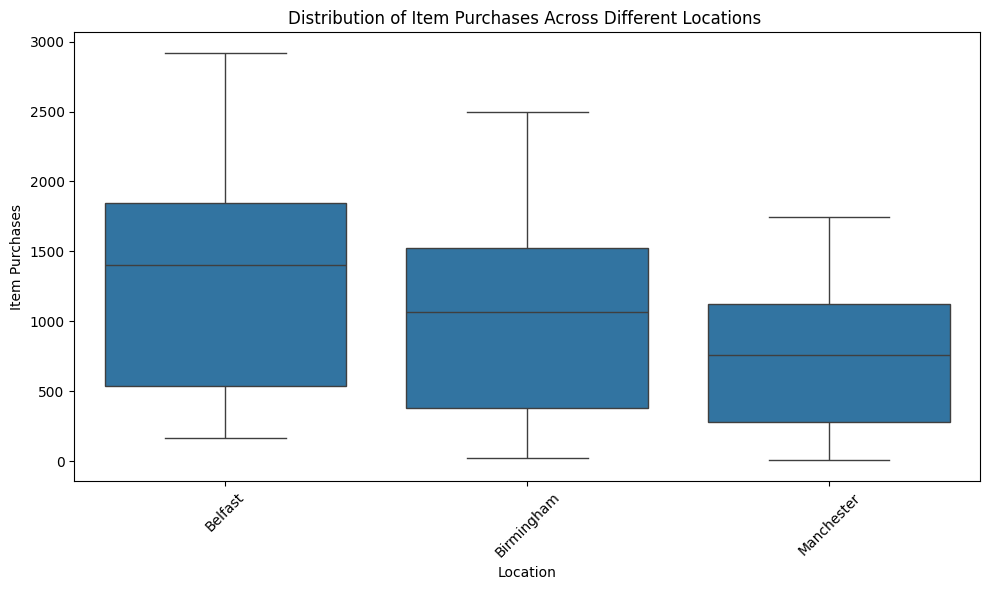

In [31]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_items_BBM, x='Location', y='Counts')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [32]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2022, x='Location', y=)
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations (2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

SyntaxError: expected argument value expression (3371495504.py, line 11)

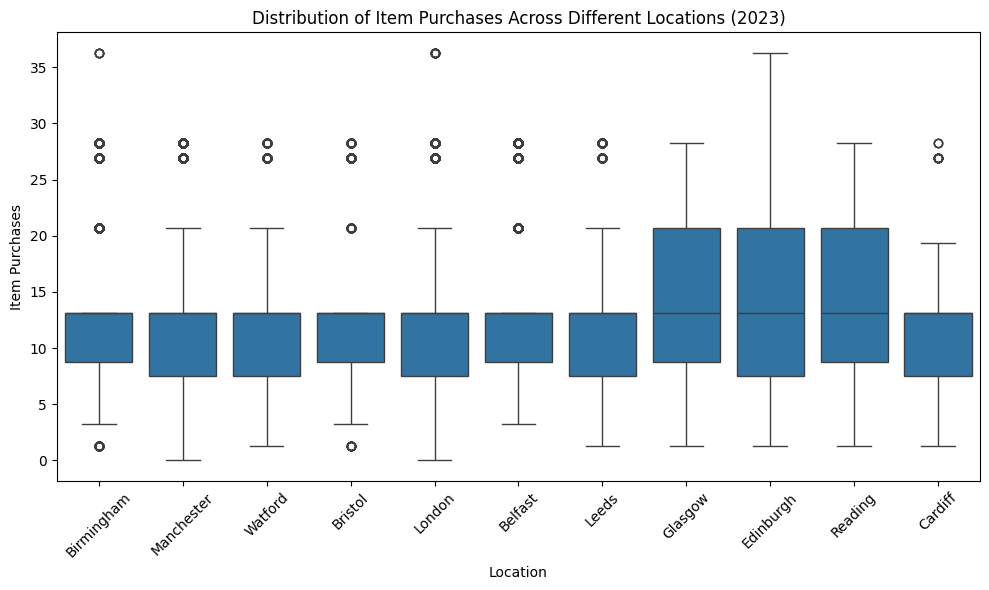

In [ ]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2023, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Purchases')
plt.title('Distribution of Item Purchases Across Different Locations (2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
print(np.percentile(df_items_London['Counts'], 75))
print(np.percentile(df_items_London['Counts'], 25))
print(np.percentile(df_items_London['Counts'], 50))

11058.0
4034.0
6313.0


In [ ]:
df_items_Belfast = df_items_BBM[df_items_BBM['Location'] == 'Belfast']
print(np.percentile(df_items_Belfast['Counts'], 75))
print(np.percentile(df_items_Belfast['Counts'], 25))
print(np.percentile(df_items_Belfast['Counts'], 50))
print('--------------------------------------------------------------------------------')
df_items_Birmingham = df_items_BBM[df_items_BBM['Location'] == 'Birmingham']
print(np.percentile(df_items_Birmingham['Counts'], 75))
print(np.percentile(df_items_Birmingham['Counts'], 25))
print(np.percentile(df_items_Birmingham['Counts'], 50))
print('--------------------------------------------------------------------------------')
df_items_Manchester= df_items_BBM[df_items_BBM['Location'] == 'Manchester']
print(np.percentile(df_items_Manchester['Counts'], 75))
print(np.percentile(df_items_Manchester['Counts'], 25))
print(np.percentile(df_items_Manchester['Counts'], 50))

1842.75
537.0
1405.5
--------------------------------------------------------------------------------
1524.5
381.5
1064.0
--------------------------------------------------------------------------------
1120.5
281.5
757.0


In [ ]:
df_items_Bristol = df_items_LBE[df_items_LBE['Location'] == 'Bristol']
df_items_Edinburgh = df_items_LBE[df_items_LBE['Location'] == 'Edinburgh']

print(np.percentile(df_items_Bristol['Counts'], 75))
print(np.percentile(df_items_Edinburgh['Counts'], 75))

376.5
353.5


In [ ]:
df_items_Edinburgh.max()

Location               Edinburgh
Item Group    iphone Accessories
Counts                       520
dtype: object

In [ ]:
df_items_BBM

,Location,Item Group,Counts
5,Belfast,iPhone Charger,2921
6,Birmingham,iPhone Charger,2499
8,Belfast,Headset Accessories,1905
9,Manchester,iPhone Charger,1743
10,Belfast,iphone Accessories,1656
11,Birmingham,Headset Accessories,1532
12,Birmingham,iphone Accessories,1517
13,Belfast,Mouse,1155
14,Manchester,Headset Accessories,1150
15,Manchester,iphone Accessories,1091


In [ ]:

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Location'], df['Cost'])
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

Doing the sairma model

In [ ]:
import pandas as pd

def items_per_week(df):
    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert the dates to weekly periods
    df['Week_Period'] = df['Date'].dt.to_period('W')

    # Now you can group by 'Week_Period'
    weekly_groups = df.groupby('Week_Period')

    # Perform some operations within each group, for example, counting the rows per week
    weekly_counts = weekly_groups.size().reset_index(name='Counts')

    # Convert the 'Week_Period' to the start date of each week
    weekly_counts['Week_Start_Date'] = weekly_counts['Week_Period'].dt.start_time

    # If you want 'Week_Start_Date' to be the first column
    weekly_counts = weekly_counts[['Week_Start_Date', 'Counts']]

    return weekly_counts


In [ ]:
items_per_week_london = items_per_week(london)
items_per_week_london = items_per_week_london.drop(items_per_week_london.index[0])


C:\Users\Boomw\AppData\Local\Temp\ipykernel_3600\2987515634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Boomw\AppData\Local\Temp\ipykernel_3600\2987515634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Period'] = df['Date'].dt.to_period('W')


In [ ]:
items_per_week_belfast = items_per_week(belfast)
items_per_week_london = items_per_week_london.drop(items_per_week_london.index[0])


C:\Users\Boomw\AppData\Local\Temp\ipykernel_3600\2987515634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Boomw\AppData\Local\Temp\ipykernel_3600\2987515634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Period'] = df['Date'].dt.to_period('W')


In [ ]:
type(items_per_week_belfast['Week_Start_Date'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
def get_fuller(location):
    adf_result = adfuller(location.groupby('Day').size())

    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))


In [ ]:
def draw_time_graph(df):
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Week_Start_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


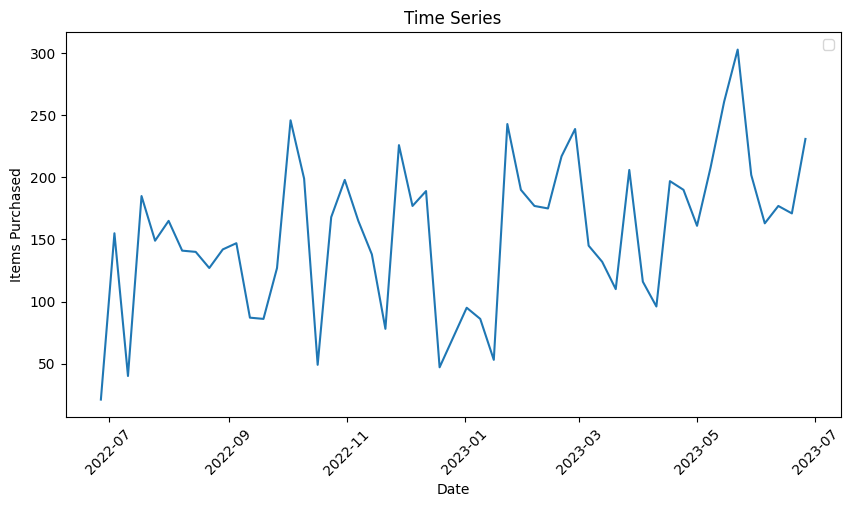

In [ ]:
draw_time_graph(items_per_week_belfast)

In [ ]:
def adfuller_test(items_purchased):
    result=adfuller(items_purchased)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(items_per_week_belfast['Counts'])

ADF Test Statistic : -5.737217800561953
p-value : 6.396963863088939e-07
#Lags Used : 0
Number of Observations Used : 51
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
def plot_acf_pacf(seasonal_difference , no_of_na):
    fig = plt.figure(figsize=(12,8))

    nlags = min(40, len(seasonal_difference.iloc[(no_of_na+1):]) // 2 - 1)

    # Assuming 'df' is your DataFrame and 'Seasonal First Difference' is a column in your DataFrame
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax1)

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax2)

    plt.show()


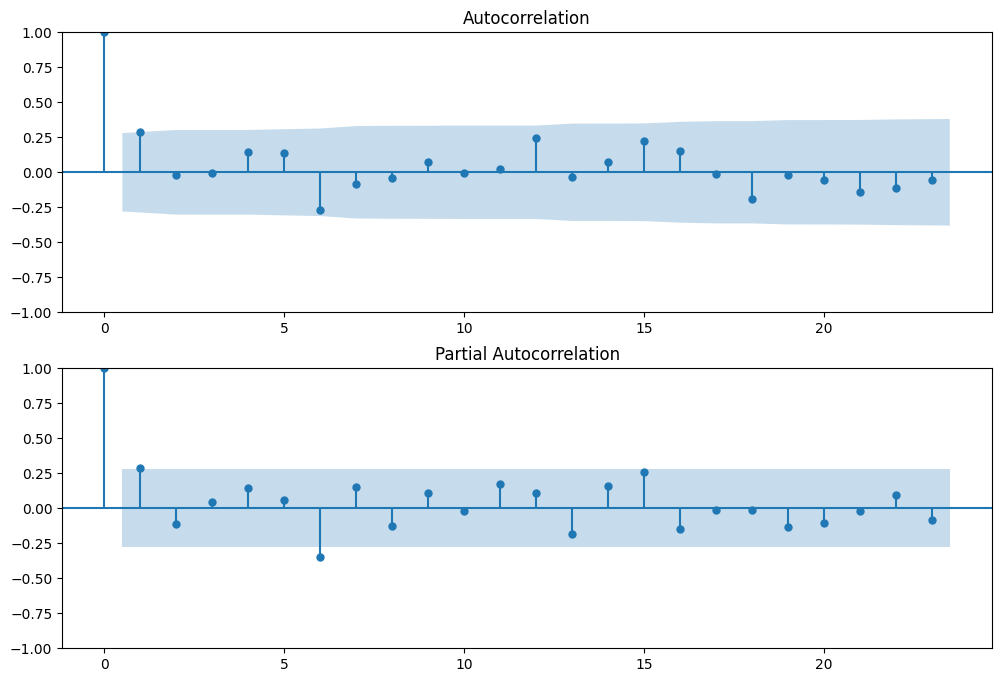

In [ ]:
plot_acf_pacf(items_per_week_belfast['Counts'] , 2)

In [ ]:
import statsmodels.api as sm

p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 10# This should be set according to your data's seasonality

# Fit a SARIMA model
model = sm.tsa.statespace.SARIMAX(items_per_week_london['Counts'],
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, s),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

# You can now print out the summary of the model
print(results.summary())

# To make future predictions:
n_periods = 2  # For example, predict for 52 periods ahead
forecast = results.get_forecast(steps=n_periods)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

print(forecast_df)


                                     SARIMAX Results                                      
Dep. Variable:                             Counts   No. Observations:                   51
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 10)   Log Likelihood                -358.671
Date:                            Sun, 07 Apr 2024   AIC                            727.342
Time:                                    21:24:33   BIC                            734.003
Sample:                                         0   HQIC                           729.378
                                             - 51                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2442   1.26e+04      0.000      1.000   -2.48e+04    2.48e+04
ma.L1         -2.3249     10.657   

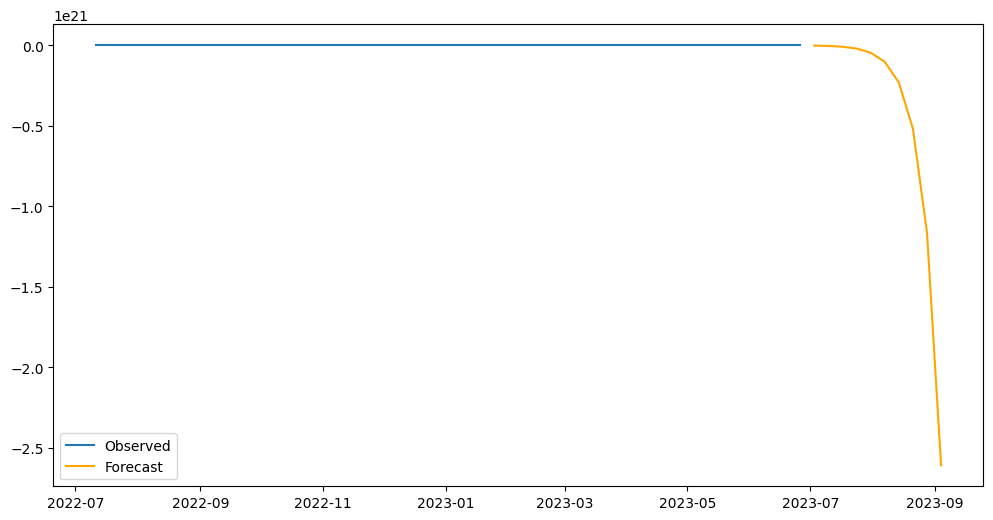

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Fit your model (assumed you've already defined 'model' with the SARIMAX class)
model_fit = model.fit()

# Correct the last known date by removing extra characters and convert to datetime
last_known_date = '2023-06-26'  # Removed the tab character
last_known_date = pd.to_datetime(last_known_date)

# Calculate the start date for the forecast as the next Monday after last_known_date
start_date = last_known_date + pd.DateOffset(days=(7 - last_known_date.weekday()))

# Now we create the date range for the forecast
forecast_date_range = pd.date_range(start=start_date, periods=10, freq='W-MON')

# Out-of-sample forecasts
forecast = model_fit.get_forecast(steps=10)  # Replace 10 with the number of future periods to forecast
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_date_range
forecast_predicted_mean = forecast.predicted_mean
forecast_predicted_mean.index = forecast_date_range

# Plotting the observed and forecasted values
plt.figure(figsize=(12, 6))

# Plot the observed values
plt.plot(items_per_week_london['Week_Start_Date'], items_per_week_london['Counts'], label='Observed')

# Plot the forecasted values
plt.plot(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

plt.legend()
plt.show()

In [ ]:
items_per_week_london['Counts']

2      911
3      915
4      765
5      917
6      955
7      747
8      753
9      670
10    1018
11    1052
12     951
13    1060
14    1078
15    1118
16    1251
17     945
18    1182
19     960
20    1226
21    1237
22    1205
23    1144
24     589
25     510
26      35
27     464
28    1317
29    1320
30    1296
31    1243
32    1260
33    1098
34    1285
35    1291
36    1294
37    1007
38    1324
39    1135
40    1030
41     808
42    1370
43    1356
44    1098
45    1190
46    1554
47    1345
48     811
49    1383
50    1421
51    1204
52    1125
Name: Counts, dtype: int64